Clustering Crime


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

C:\Users\Meenal Patel\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
dfhc=pd.read_csv("crime_data.csv")
dfhc

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


# EDA

In [ ]:
dfhc.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [ ]:
dfhc.shape

(50, 5)

In [ ]:
dfhc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
 5   y_hc        50 non-null     int64  
 6   y_km        50 non-null     int32  
 7   y_db        50 non-null     int64  
dtypes: float64(2), int32(1), int64(4), object(1)
memory usage: 3.1+ KB


In [ ]:
dfhc.describe()

,Murder,Assault,UrbanPop,Rape,y_hc,y_km,y_db
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000,0.020000,1.400000,0.620000
std,4.35551,83.337661,14.474763,9.366385,0.141421,1.049781,0.696639
min,0.80000,45.000000,32.000000,7.300000,0.000000,0.000000,-1.000000
25%,4.07500,109.000000,54.500000,15.075000,0.000000,0.250000,0.250000
50%,7.25000,159.000000,66.000000,20.100000,0.000000,1.500000,1.000000
75%,11.25000,249.000000,77.750000,26.175000,0.000000,2.000000,1.000000
max,17.40000,337.000000,91.000000,46.000000,1.000000,3.000000,1.000000


# Standerdization

In [ ]:
scalar=MinMaxScaler()
dfhc_scaled=scalar.fit_transform(dfhc.iloc[:,1:])

In [ ]:
dfhc_norm=pd.DataFrame(dfhc_scaled)
dfhc_norm

,0,1,2,3
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


## Hierarchichal Clustering

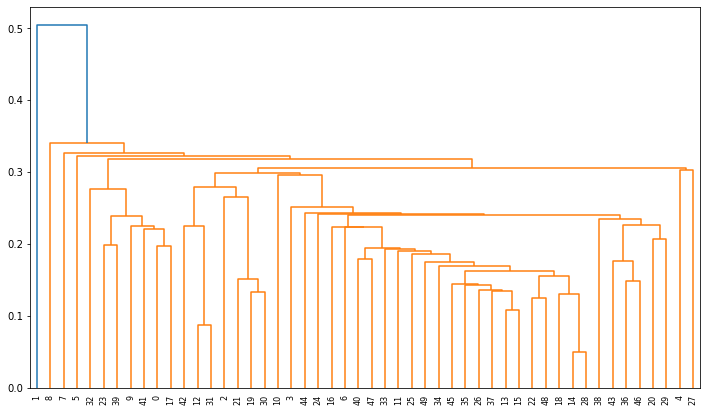

In [ ]:
plt.figure(figsize=(12,7))
dendrogram=sch.dendrogram(sch.linkage(dfhc_norm,method='single'))

In [ ]:
from sklearn.metrics import silhouette_score as sil

In [ ]:
nc=[2,3,4,5,6,7,8,9]
score=[]
for i in nc:
    hc=AgglomerativeClustering(n_clusters=i,affinity='euclidean', linkage='single')
    y=hc.fit_predict(dfhc_norm)
    score.append(sil(dfhc_norm,y))
print(score)

[0.21033337025958487, 0.14223288708185444, -0.1674119195474404, -0.18215418215195153, -0.058198610679380244, -0.0034333764345219286, -0.01103044204030864, 0.14313198214355002]


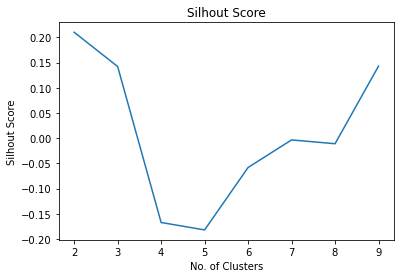

In [ ]:
plt.plot(nc,score)
plt.title("Silhout Score")
plt.xlabel("No. of Clusters")
plt.ylabel("Silhout Score")
plt.show()

## So the best score is for first index, i.e optimum no of clusters is 2.

In [ ]:
hc=AgglomerativeClustering(n_clusters=2,affinity='euclidean', linkage='single')
y_hc=hc.fit_predict(dfhc_norm)
score.append(sil(dfhc_norm,y))
y_hc

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [ ]:
dfhc['y_hc']=y_hc

In [ ]:
dfhc

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,y_hc
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


In [ ]:
dfhc.groupby(['y_hc'])['Unnamed: 0'].apply(lambda x:tuple(x))

y_hc
0    (Alabama, Arizona, Arkansas, California, Color...
1                                            (Alaska,)
Name: Unnamed: 0, dtype: object

In [ ]:
dfhc[dfhc['Unnamed: 0'].isin(['Florida'])]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,y_hc
8,Florida,15.4,335,80,31.9,0


In [ ]:
dfhc['y_hc'].value_counts()

0    49
1     1
Name: y_hc, dtype: int64

In [ ]:
dfhc[dfhc['Unnamed: 0'].isin(['Arizona', 'Arkansas', 'Connecticut','Florida'])]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,y_hc
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
6,Connecticut,3.3,110,77,11.1,0
8,Florida,15.4,335,80,31.9,0


## KMeans

In [ ]:
dfkm=pd.read_csv("crime_data.csv")

# Normalization

In [ ]:
scalar=MinMaxScaler()
dfkm_scaled=scalar.fit_transform(dfkm.iloc[:,1:])

In [ ]:
dfkm_norm=pd.DataFrame(dfkm_scaled)
dfkm_norm

,0,1,2,3
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [ ]:
dfkm_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       50 non-null     float64
 1   1       50 non-null     float64
 2   2       50 non-null     float64
 3   3       50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [ ]:
score=[]
score_elbow=[]
nc=[2,3,4,5,6]
for i in nc:
    kmeans=KMeans(i)
    kmeans.fit(dfkm_norm)
    y_pred=kmeans.fit_predict(dfkm_norm)
    score.append(sil(dfkm_norm,y_pred))
    score_elbow.append(kmeans.inertia_)   
print(score)
print(score_elbow)

[0.42364457559625074, 0.31705482042661864, 0.34089035600743633, 0.3018188352484066, 0.2806734125823691]
[6.596893867946196, 5.01849999148911, 3.6834561535859134, 3.191135706858944, 2.8566826167870354]


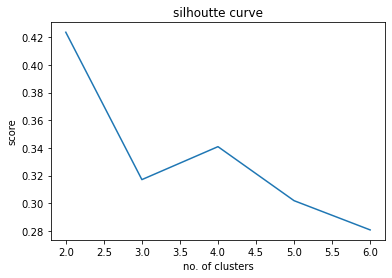

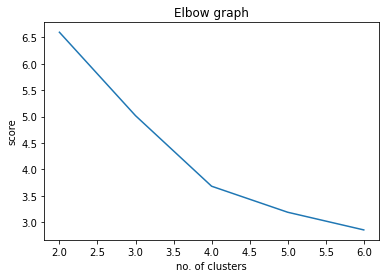

In [ ]:
plt.plot(nc,score)
plt.xlabel('no. of clusters')
plt.ylabel('score')
plt.title('silhoutte curve')
plt.show()

plt.plot(nc,score_elbow)
plt.xlabel('no. of clusters')
plt.ylabel('score')
plt.title('Elbow graph')
plt.show()

# Best score is for index 4 so optimum no. of cluster is 4.

In [ ]:
kmm=KMeans(n_clusters=4)
kmm.fit(dfkm_norm)
y_km=kmm.fit_predict(dfkm_norm)

In [ ]:
y_km

array([3, 1, 1, 3, 1, 1, 2, 2, 1, 3, 2, 0, 1, 2, 0, 2, 0, 3, 0, 1, 2, 1,
       0, 3, 2, 0, 0, 1, 0, 2, 1, 1, 3, 0, 2, 2, 2, 2, 2, 3, 0, 3, 1, 2,
       0, 2, 2, 0, 0, 2])

In [ ]:
pd.DataFrame(kmm.labels_).value_counts()

2    17
0    13
1    12
3     8
dtype: int64

In [ ]:
dfkm['y_km']=y_km

In [ ]:
dfkm

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,y_km
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,2
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [ ]:
dfkm['y_km'].value_counts()

2    17
0    13
1    12
3     8
Name: y_km, dtype: int64

In [ ]:
dfkm[dfkm['Unnamed: 0'].isin(['Arizona', 'Arkansas', 'Connecticut','Florida'])]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,y_km
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,3
6,Connecticut,3.3,110,77,11.1,2
8,Florida,15.4,335,80,31.9,1


In [ ]:
dfkm.groupby(['y_km'])['Unnamed: 0'].apply(lambda x:tuple(x))

y_km
0    (Idaho, Iowa, Kentucky, Maine, Minnesota, Mont...
1    (Alaska, Arizona, California, Colorado, Florid...
2    (Connecticut, Delaware, Hawaii, Indiana, Kansa...
3    (Alabama, Arkansas, Georgia, Louisiana, Missis...
Name: Unnamed: 0, dtype: object

## DBSCAN

In [ ]:
dfdb=pd.read_csv('crime_data.csv')
dfdb

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


# Normalization

In [ ]:
scalar=MinMaxScaler()
dfdb_scaled=scalar.fit_transform(dfdb.iloc[:,1:])

In [ ]:
dfdb_norm=pd.DataFrame(dfdb_scaled)
dfdb_norm

,0,1,2,3
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [ ]:
dbscan=DBSCAN(eps=0.3,min_samples=4)
dbscan.fit(dfdb_norm)
y_db_1=dbscan.fit_predict(dfdb_norm)
y_db_1

array([ 0, -1,  1,  1, -1, -1,  1, -1, -1,  0,  1,  1,  1,  1,  1,  1,  1,
        0,  1,  1,  1,  1,  1,  0,  1,  1,  1, -1,  1,  1,  1,  1,  0,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [ ]:
dfdb['y_db']=y_db_1
dfdb

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,y_db
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,-1
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,0


In [ ]:
dfdb['y_db'].value_counts()

 1    37
 0     7
-1     6
Name: y_db, dtype: int64

In [ ]:
dfdb[dfdb['Unnamed: 0'].isin(['Arizona', 'Arkansas', 'Connecticut','Florida'])]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,y_db
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,1
6,Connecticut,3.3,110,77,11.1,1
8,Florida,15.4,335,80,31.9,-1


In [ ]:
dfhc['y_hc']=y_hc
dfhc['y_km']=y_km
dfhc['y_db']=y_db_1
dfhc

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,y_hc,y_km,y_db
0,Alabama,13.2,236,58,21.2,0,3,0
1,Alaska,10.0,263,48,44.5,1,1,-1
2,Arizona,8.1,294,80,31.0,0,1,1
3,Arkansas,8.8,190,50,19.5,0,3,1
4,California,9.0,276,91,40.6,0,1,-1
5,Colorado,7.9,204,78,38.7,0,1,-1
6,Connecticut,3.3,110,77,11.1,0,2,1
7,Delaware,5.9,238,72,15.8,0,2,-1
8,Florida,15.4,335,80,31.9,0,1,-1
9,Georgia,17.4,211,60,25.8,0,3,0


# For Hierarchical we are getting 2 clusters, for KMeans we are getting 4 clusters and for DBSCAN we are getting 3 clusters.